In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import defaultdict
from tqdm import tqdm
import time

%matplotlib inline

In [3]:
print(tf.__version__)

2.18.0


In [5]:
SEQ_START = '<start>'
SEQ_END = '<end>'

In [7]:
BASE = 'D:\Major_Project\Dataset2'

IMAGE_PATH = os.path.join(BASE, 'Images')
CAPTION_PATH = os.path.join(BASE, 'Flickr8k_text')
CAPTION_FULL = os.path.join(CAPTION_PATH, 'Flickr8k.token.txt')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\admin\AppData\Local\Temp\ipykernel_21552\3139302747.py:1: SyntaxWarning: invalid escape sequence '\M'
  BASE = 'D:\Major_Project\Dataset2'


In [9]:
os.listdir(BASE)

['captions.txt', 'features_try1', 'Flickr8k_text', 'Images']

In [11]:
captions_map = defaultdict(list)

with open(CAPTION_FULL) as file:
    lines = file.readlines()
    for line in lines:
        data = line.split('\t')
        image_id = data[0].split('#')[0]
        caption = SEQ_START + ' ' + data[1].strip() + ' ' + SEQ_END
        
        captions_map[image_id].append(caption)

In [13]:
len(list(captions_map.keys()))

8091

1000268201_693b08cb0e.jpg
<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>
<start> A girl going into a wooden building . <end>
<start> A little girl climbing into a wooden playhouse . <end>
<start> A little girl climbing the stairs to her playhouse . <end>
<start> A little girl in a pink dress going into a wooden cabin . <end>


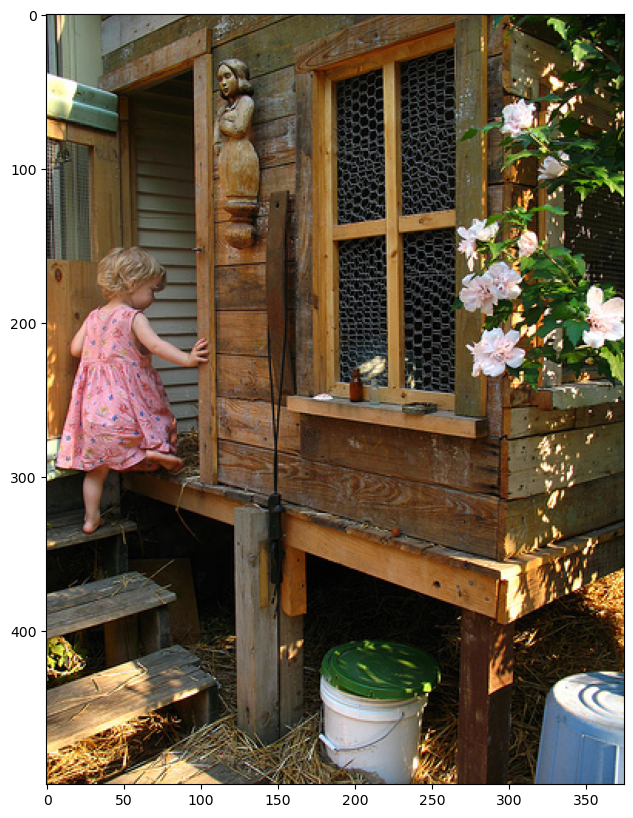

In [15]:
ex_image = os.listdir(IMAGE_PATH)[0]
print(ex_image)
ex_captions = captions_map[ex_image]

plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(os.path.join(IMAGE_PATH, ex_image)))

for caption in ex_captions:
    print(caption)

In [17]:
all_captions = []
all_image_paths = []
for image_id in captions_map:
    all_captions.extend(captions_map[image_id])
    all_image_paths.extend([os.path.join(IMAGE_PATH, image_id)] * len(captions_map[image_id]))

In [19]:
all_captions[:5]

['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>']

In [21]:
(all_image_paths[:10])

['D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg']

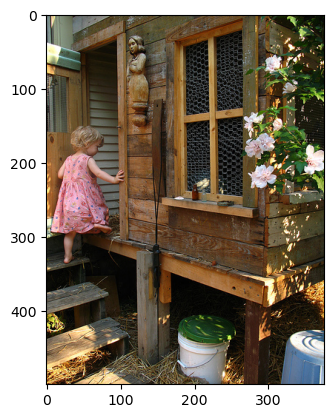

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
img_path='D:\\Major_Project\\Dataset1\\Images\\1000268201_693b08cb0e.jpg'

img=Image.open(img_path)
plt.imshow(img)
plt.show()

In [25]:
caption_dataset = tf.data.Dataset.from_tensor_slices(all_captions)

In [27]:
def standardize(inputs):
    inputs = tf.strings.lower(inputs)
    return tf.strings.regex_replace(inputs,
                                    r"!\"#$%&\(\)\*\+.,-/:;=?@\[\\\]^_`{|}~", "")

In [29]:
# Parameters for tokenizer
MAX_LENGTH = 50
VOCAB_SIZE = 5000

# Tokenizer
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    standardize=standardize,
    output_sequence_length=MAX_LENGTH)

# Learn the vocabulary from the caption data.
tokenizer.adapt(caption_dataset)

In [37]:
caption_vectors = caption_dataset.map(lambda x: tokenizer(x))

In [39]:
for cap in caption_vectors.take(1):
    print(cap)

tf.Tensor(
[  3   2  45   6   2  93 173   9 122  56   2 400  14 397   6  31   1 698
   5   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int64)


In [41]:
word_to_index = tf.keras.layers.StringLookup(mask_token="", vocabulary=tokenizer.get_vocabulary())
index_to_word = tf.keras.layers.StringLookup(mask_token="", vocabulary=tokenizer.get_vocabulary(), invert=True)

In [43]:
# use for TF version < 2.8
def word2index(word):
    return tf.squeeze(word_to_index(tf.constant([word])))

def index2word(index):
    return tf.squeeze(index_to_word(tf.constant([index])))

In [45]:
all_image_paths

['D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1000268201_693b08cb0e.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1001773457_577c3a7d70.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1002674143_1b742ab4b8.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1002674143_1b742ab4b8.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1002674143_1b742ab4b8.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1002674143_1b742ab4b8.jpg',
 'D:\\Major_Project\\Dataset2\\Images\\1002674143_1b742ab4b8.j

# Image

In [48]:
# Get unique images
unique_image_paths = sorted(set(all_image_paths))
len(unique_image_paths)

8091

In [50]:
import tensorflow as tf
import numpy as np
import os
import cv2
import torch
from ultralytics import YOLO
from tqdm import tqdm

# Paths
feature_output_dir = "D:\\Major_Project\\features_try1"
os.makedirs(feature_output_dir, exist_ok=True)

In [51]:
# Load YOLOv8
yolo_model = YOLO("yolov8n.pt")


In [54]:
# Load EfficientNetB7
image_model = tf.keras.applications.EfficientNetB7(include_top=False, weights="imagenet", pooling='avg')  # ➤ Output shape: (batch_size, 2560)
image_features_extract_model = tf.keras.Model(inputs=image_model.input, outputs=image_model.output)

# image_model = tf.keras.applications.EfficientNetB7(include_top=False, weights="imagenet")
# new_input = image_model.input
# hidden_layer = image_model.layers[-1].output
# image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [56]:

# Load Image for EfficientNetB7
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (600, 600))  # Required input for EfficientNetB7
    img = tf.keras.applications.efficientnet.preprocess_input(img)
    return img, image_path

In [58]:

# Extract YOLOv8 Features
# def extract_yolo_features(image_path, max_yolo_length=1024):  # Set max length for padding
#     image = cv2.imread(image_path)
#     results = yolo_model(image)

#     yolo_features = []
#     for result in results:
#         yolo_features.append(result.boxes.data.cpu().numpy().flatten())

#     yolo_features = np.concatenate(yolo_features, axis=0) if yolo_features else np.zeros(256)

#     # Ensure Consistent Shape
#     if yolo_features.shape[0] < max_yolo_length:
#         yolo_features = np.pad(yolo_features, (0, max_yolo_length - yolo_features.shape[0]), 'constant')
#     elif yolo_features.shape[0] > max_yolo_length:
#         yolo_features = yolo_features[:max_yolo_length]

#     return yolo_features

# Extract YOLOv8 Features
def extract_yolo_features(image_path, max_yolo_length=1024):
    image = cv2.imread(image_path)
    results = yolo_model(image)

    yolo_features = []
    for result in results:
        yolo_features.append(result.boxes.data.cpu().numpy().flatten())

    yolo_features = np.concatenate(yolo_features, axis=0) if yolo_features else np.zeros(256)

    if yolo_features.shape[0] < max_yolo_length:
        yolo_features = np.pad(yolo_features, (0, max_yolo_length - yolo_features.shape[0]), 'constant')
    elif yolo_features.shape[0] > max_yolo_length:
        yolo_features = yolo_features[:max_yolo_length]

    return yolo_features  # Shape: (1024,)


In [60]:
# Load Images
# image_paths = sorted(set(os.listdir("Images")))  
# unique_image_paths = [os.path.join("Images", path) for path in image_paths]
# Get unique images
unique_image_paths = sorted(set(all_image_paths))
len(unique_image_paths)

8091

In [62]:
# Create TensorFlow Dataset
# image_dataset = tf.data.Dataset.from_tensor_slices(unique_image_paths)
# image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(2)

# Create Dataset
image_dataset = tf.data.Dataset.from_tensor_slices(unique_image_paths)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(2)


# after image

In [65]:
image_to_caption_vectors = defaultdict(list)
for image_path, caption in zip(all_image_paths, caption_vectors):
    image_to_caption_vectors[image_path].append(caption)

In [66]:
# Create training and validation sets using an 80-20 split randomly.
# image_keys = list(image_to_caption_vectors.keys())
random.shuffle(unique_image_paths)
slice_index = int(len(unique_image_paths) * 0.8)
train_paths, val_paths = unique_image_paths[:slice_index], unique_image_paths[slice_index:]

In [69]:
image_train_paths =[]
caption_train = []
for path in train_paths:
    caption_len = len(image_to_caption_vectors[path])
    image_train_paths.extend([path] * caption_len)
    caption_train.extend(image_to_caption_vectors[path])

image_val_paths = []
caption_val = []
for path in val_paths:
    caption_len = len(image_to_caption_vectors[path])
    image_val_paths.extend([path] * caption_len)
    caption_val.extend(image_to_caption_vectors[path])

len(image_train_paths), len(caption_train), len(image_val_paths), len(caption_val)

(32360, 32360, 8095, 8095)

# training

In [72]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000

In [74]:
# Load the numpy files (pre-extracted features)
# def map_func(image_path, caption):
#     img_tensor = np.load(image_path.decode('utf-8') + '.npy')
#     return img_tensor, caption
def map_func(image_path, caption):
    npy_path = image_path.decode('utf-8').replace('.jpg', '.npy')  # Ensure correct filename
    img_tensor = np.load(npy_path)  # Load the .npy file
    return img_tensor, caption

In [76]:
dataset = tf.data.Dataset.from_tensor_slices((image_train_paths, caption_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
                            map_func, [item1, item2], [tf.float32, tf.int64]
                      )
                      , num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# model

In [78]:
def create_look_ahead_mask(sequence_length):
    mask = tf.linalg.band_part(tf.ones((1, sequence_length, sequence_length)), -1, 0)
    return mask 

def create_padding_mask(decoder_token_ids):
    seq = 1 - tf.cast(tf.math.equal(decoder_token_ids, 0), tf.float32)
  
    return seq[:, tf.newaxis, :] 

# pos enc

In [82]:
def get_angles(pos, i, d_model):
    '''
      Notice that the equations of positional encoding above is about 2i, and this
      function is about i, so that we compute (i // 2).

      "Angle" means the expression inside of sin and cosine function.
    '''
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

In [84]:
def positional_encoding_1d(position, D):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],  # column vector
                            np.arange(D)[np.newaxis, :],  # row vector
                            D)

    # Apply the sine function to even indices
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # Apply the cosine function to odd indices
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

In [86]:
def positional_encoding_2d(row, col, D):
    assert D % 2 == 0
    # first D/2 encode row embedding and second D/2 encode column embedding
    row_pos = np.repeat(np.arange(row), col)[:, np.newaxis]
    col_pos = np.repeat(np.expand_dims(np.arange(col), 0), row, axis=0).reshape(-1, 1)

    angle_rads_row = get_angles(row_pos,
                                np.arange(D // 2)[np.newaxis, :],
                                D // 2)
    angle_rads_col = get_angles(col_pos,
                                np.arange(D // 2)[np.newaxis, :],
                                D // 2)
    
    # apply sin and cos to odd and even indices resp.
    angle_rads_row[:, 0::2] = np.sin(angle_rads_row[:, 0::2])
    angle_rads_row[:, 1::2] = np.cos(angle_rads_row[:, 1::2])
    angle_rads_col[:, 0::2] = np.sin(angle_rads_col[:, 0::2])
    angle_rads_col[:, 1::2] = np.cos(angle_rads_col[:, 1::2])

    pos_encoding = np.concatenate([angle_rads_row, angle_rads_col], axis=1)[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

In [88]:
def positional_encoding(max_seq_len, emb_dim, encoding_type="1d", row=None, col=None):
    """
    Returns positional encoding for 1D or 2D sequences.

    Args:
        max_seq_len (int): Maximum sequence length (for 1D).
        emb_dim (int): Embedding dimension.
        encoding_type (str): "1d" for 1D encoding, "2d" for 2D encoding.
        row (int): Number of rows (needed for 2D).
        col (int): Number of columns (needed for 2D).

    Returns:
        Tensor: Positional encoding tensor.
    """
    if encoding_type == "1d":
        return positional_encoding_1d(max_seq_len, emb_dim)
    elif encoding_type == "2d":
        assert row is not None and col is not None, "row and col must be provided for 2D encoding"
        return positional_encoding_2d(row, col, emb_dim)
    else:
        raise ValueError("Invalid encoding_type. Choose '1d' or '2d'.")

In [90]:
def point_wise_feed_forward_network(
    emb_dim,  # Input/output dimensionality (or Embedding dim)
    fc_dim  # Inner-layer dimensionality (or FC dim)
):

    return tf.keras.Sequential([
        # Shape `(batch_size, seq_len, fc_dim)`.
        tf.keras.layers.Dense(fc_dim, activation='relu'),
        # Shape `(batch_size, seq_len, emb_dim)`.
        tf.keras.layers.Dense(emb_dim)
    ])


# Encoder

In [93]:
class EncoderBlock(tf.keras.layers.Layer):
    def __init__(self, emb_dim, num_heads, fc_dim,
                 dropout_rate=0.1, layernorm_eps=1e-6):
        super(EncoderBlock, self).__init__()

        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads,
                                                      key_dim=emb_dim,
                                                      dropout=dropout_rate)

        self.ffn = point_wise_feed_forward_network(emb_dim=emb_dim,
                                                   fc_dim=fc_dim)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)

        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, training, mask):
        """
            `mask` is padding mask
        """
        attn_output = self.mha(query=x, key=x, value=x,
                               training=training, attention_mask=mask)

        # (batch_size, input_seq_len, fully_connected_dim)
        out1 = self.layernorm1(attn_output + x, training=training)

        # (batch_size, input_seq_len, fully_connected_dim)
        ffn_output = self.ffn(out1, training=training)

        ffn_output = self.dropout1(ffn_output, training=training)

        # (batch_size, input_seq_len, fully_connected_dim)
        encoder_layer_out = self.layernorm2(ffn_output + out1, training=training)

        return encoder_layer_out


In [95]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self,
                 *,
                 num_layers,
                 emb_dim,  # Input/output dimensionality (or Embedding dim).
                 num_heads,
                 fc_dim,  # Inner-layer dimensionality (or FC dim).
                 row_size, col_size,  # Shape of grid features
                 dropout_rate=0.1,
                 layernorm_eps=1e-6):
        super().__init__()

        self.emb_dim = emb_dim
        self.num_layers = num_layers

        # Embeddings (it's just a Dense layer)
        self.embedding = tf.keras.layers.Dense(emb_dim, activation='relu')
        # Positional encoding 2D
        self.pos_encoding = positional_encoding_2d(row_size, col_size, emb_dim)

        # self.pos_encoding = positional_encoding_1d(100,emb_dim)
        # Encoder layers.
        self.enc_layers = [EncoderBlock(emb_dim=emb_dim,
                                        num_heads=num_heads,
                                        fc_dim=fc_dim,
                                        dropout_rate=dropout_rate,
                                        layernorm_eps=layernorm_eps)
            for _ in range(num_layers)]

        # Dropout.
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, training, mask=None):
    
        # seq_len = tf.shape(x)[1]

        # # Sum up embeddings and positional encoding.
        # x = self.embedding(x)
        # x += self.pos_encoding[:, :seq_len, :]

        # # Add dropout.
        # x = self.dropout(x, training=training)

        # # N encoder blocks.
        # for i in range(self.num_layers):
        #     # x = self.enc_layers[i](x, training, mask)
        #     x = self.enc_layers[i](x, training=training, mask=mask)

        # return x  # Shape `(batch_size, input_seq_len, emb_dim)`.
         # x shape: (batch_size, 3584)
        batch_size = tf.shape(x)[0]
        
        seq_len = 7  # Adjust as needed
        emb_dim = 512
        
        # Reshape image features
        x = tf.reshape(x, (batch_size, seq_len, emb_dim))  # → (batch_size, 7, 512)
        
        # Add positional encoding
        x += self.pos_encoding[:, :seq_len, :]
        
        x = self.dropout(x, training=training)
        
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training=training, mask=mask)
        
        return x  # (batch_size, seq_len, emb_dim)
        


# Decoder

In [98]:
class DecoderBlock(tf.keras.layers.Layer):
    def __init__(self,
                 *,
                 emb_dim,  # Input/output dimensionality (or Embedding dim).
                 num_heads,
                 fc_dim,  # Inner-layer dimensionality (or FC dim).
                 dropout_rate=0.1,
                 layernorm_eps=1e-6):
        super().__init__()

        # Masked multi-head self-attention.
        self.mha_masked = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,
            # Size of each attention head for query Q and key K.
            key_dim=emb_dim,
            dropout=dropout_rate
        )
        # Multi-head cross-attention.
        self.mha_cross = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,
            # Size of each attention head for query Q and key K.
            key_dim=emb_dim,
            dropout=dropout_rate
        )

        # Point-wise feed-forward network.
        self.ffn = point_wise_feed_forward_network(emb_dim, fc_dim)

        # Layer normalization.
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)

        # Dropout for the point-wise feed-forward network.
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, enc_output, training, look_ahead_mask=None, padding_mask=None):
        # The encoder output shape is `(batch_size, input_seq_len, emb_dim)`.

        attn_masked, attn_weights_masked = self.mha_masked(
            query=x,
            value=x,
            key=x,
            # A boolean mask that prevents attention to certain positions.
            attention_mask=look_ahead_mask,
            # Shape `(batch_size, target_seq_len, emb_dim)`.
            return_attention_scores=True,
            training=training
        )

        out1 = self.layernorm1(attn_masked + x)

        attn_cross, attn_weights_cross = self.mha_cross(
            query=out1,
            value=enc_output,
            key=enc_output,
            # A boolean mask that prevents attention to certain positions.
            attention_mask=padding_mask,
            # Shape `(batch_size, target_seq_len, emb_dim)`.
            return_attention_scores=True,
            training=training
        )

        out2 = self.layernorm2(attn_cross + out1)

        # Shape `(batch_size, target_seq_len, emb_dim)`.
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout1(ffn_output, training=training)
        
        # Shape `(batch_size, target_seq_len, emb_dim)`.
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_masked, attn_weights_cross

In [100]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self,
                 *,
                 num_layers,
                 emb_dim,  # Input/output dimensionality.
                 num_heads,
                 fc_dim,  # Inner-layer dimensionality.
                 target_vocab_size,
                 dropout_rate=0.1,
                 layernorm_eps=1e-6):
        super(Decoder, self).__init__()

        self.emb_dim = emb_dim
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(
            target_vocab_size,
            emb_dim,
            mask_zero=True
        )
        self.pos_encoding = positional_encoding_1d(MAX_LENGTH, emb_dim)

        self.dec_layers = [
            DecoderBlock(
                emb_dim=emb_dim,
                num_heads=num_heads,
                fc_dim=fc_dim,
                dropout_rate=dropout_rate,
                layernorm_eps=layernorm_eps)
            for _ in range(num_layers)
        ]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        # seq_len = tf.shape(x)[1]
        # attention_weights = {}

        # # Sum up embeddings and positional encoding.
        # # Shape: `(batch_size, target_seq_len, emb_dim)`.
        # x = self.embedding(x)
        # x *= tf.math.sqrt(tf.cast(self.emb_dim, tf.float32))
        # x += self.pos_encoding[:, :seq_len, :]

        # x = self.dropout(x, training=training)

        # for i in range(self.num_layers):
        #     #x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)
        #     x, block1, block2 = self.dec_layers[i](x, enc_output, training=training, look_ahead_mask=look_ahead_mask, padding_mask=padding_mask)

        #     attention_weights[f'decoder_layer{i+1}_block1'] = block1
        #     attention_weights[f'decoder_layer{i+1}_block2'] = block2

        # # The shape of x is `(batch_size, target_seq_len, emb_dim)`.
        # return x, attention_weights
        # x: target tokens → shape: (batch_size, target_seq_len)
        seq_len = tf.shape(x)[1]
        attention_weights = {}
    
        # Embed target tokens
        x = self.embedding(x)  # (batch_size, target_seq_len, emb_dim)
        x *= tf.math.sqrt(tf.cast(self.emb_dim, tf.float32))  # Scale embedding
        x += self.pos_encoding[:, :seq_len, :]  # Add positional encoding
    
        x = self.dropout(x, training=training)
    
        # N decoder layers
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training=training,
                                                   look_ahead_mask=look_ahead_mask,
                                                   padding_mask=padding_mask)
    
            attention_weights[f'decoder_layer{i+1}_block1'] = block1
            attention_weights[f'decoder_layer{i+1}_block2'] = block2
    
        # x → (batch_size, target_seq_len, emb_dim)
        return x, attention_weights
        


# Transformer Model

In [103]:
class Transformer(tf.keras.Model):
    def __init__(self,
                 *,
                 num_layers,  # Number of encoder and decoder layers.
                 emb_dim,  # Input/output dimensionality.
                 num_heads,
                 fc_dim,  # Inner-layer dimensionality.
                 row_size, col_size,
                 target_vocab_size,  # Target (English) vocabulary size.
                 dropout_rate=0.1,
                 layernorm_eps=1e-6):
        super().__init__()
        # The encoder.
        self.encoder = Encoder(
            num_layers=num_layers,
            emb_dim=emb_dim,
            num_heads=num_heads,
            fc_dim=fc_dim,
            row_size=row_size,
            col_size=col_size,
            dropout_rate=dropout_rate,
            layernorm_eps=layernorm_eps
        )

        # The decoder.
        self.decoder = Decoder(
            num_layers=num_layers,
            emb_dim=emb_dim,
            num_heads=num_heads,
            fc_dim=fc_dim,
            target_vocab_size=target_vocab_size,
            dropout_rate=dropout_rate,
            layernorm_eps=layernorm_eps
        )

        # The final linear layer.
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, input, target, training, enc_padding_mask=None, look_ahead_mask=None, dec_padding_mask=None):
        # The encoder output.
        # `(batch_size, inp_seq_len, emb_dim)`
        #enc_output = self.encoder(input, training, enc_padding_mask)
        #enc_output = self.encoder(input, training=training, mask=enc_padding_mask)
        enc_output = self.encoder(input, training=training, mask=enc_padding_mask)  # ✅ Ensure keyword arguments

        # The decoder output shape == (batch_size, tar_seq_len, emb_dim)
        dec_output, attention_weights = self.decoder(target, enc_output, training=training, 
                                                     look_ahead_mask=look_ahead_mask, 
                                                     padding_mask=dec_padding_mask,
                                                    )

        # The final linear layer output.
        # Shape `(batch_size, tar_seq_len, target_vocab_size)`.
        final_output = self.final_layer(dec_output)

        # Return the final output and the attention weights.
        return final_output, attention_weights

# Ini model

In [106]:
num_layer = 4
emb_dim = 512
fc_dim = 2048
num_heads = 8
row_size = 8
col_size = 8
target_vocab_size = VOCAB_SIZE
dropout_rate = 0.1

In [108]:
transformer = Transformer(num_layers=num_layer,
                          emb_dim=emb_dim,
                          num_heads=num_heads,
                          fc_dim=fc_dim,
                          row_size=row_size,
                          col_size=col_size,
                          target_vocab_size=VOCAB_SIZE,
                          dropout_rate=dropout_rate)

# custom training

In [111]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [113]:
learning_rate = CustomSchedule(emb_dim)

In [115]:
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [117]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [119]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

# checkpoints

In [122]:
checkpoint_path = './checkpoints/train'
os.makedirs(checkpoint_path, exist_ok=True)
ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# If a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored!!')

In [124]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
loss_plot = []

In [126]:
@tf.function()
def train_step(input_tensor, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar_inp)[1])
    dec_padding_mask = None

    with tf.GradientTape() as tape:
        #predictions, _ = transformer(input_tensor, tar_inp, True, None, look_ahead_mask, dec_padding_mask)
        predictions, _ = transformer(
            input=input_tensor, 
            target=tar_inp, 
            training=True,   
            enc_padding_mask=None, 
            look_ahead_mask=look_ahead_mask, 
            dec_padding_mask=dec_padding_mask)

        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    
    train_loss(loss)

In [128]:
@tf.function()
def train_step(input_tensor, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar_inp)[1])
    dec_padding_mask = None

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
        input=input_tensor, 
        target=tar_inp, 
        training=True,   # ✅ Passed as a keyword argument
        enc_padding_mask=None, 
        look_ahead_mask=look_ahead_mask, 
        dec_padding_mask=dec_padding_mask)


        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    
    train_loss(loss)


# TESTING LOADED MODEL

In [163]:
# Build the model with the expected input shapes
transformer.build(input_shape=[(None, 3584), (None, None)])  # (image_features, captions)

In [165]:
# Load the saved weights
transformer.load_weights('./checkpoints/transformer_weights.weights.h5')
print("Weights loaded successfully!")

Weights loaded successfully!


In [166]:
# Generate a dummy caption
dummy_image_features = tf.random.normal((1, 3584))  # Shape: (1, 3584)
dummy_caption = tf.random.uniform((1, 10), minval=0, maxval=100, dtype=tf.int32)  # Shape: (1, 10)

# Generate predictions
predictions, _ = transformer(dummy_image_features, dummy_caption, training=False)
print("Predictions shape:", predictions.shape)

Predictions shape: (1, 10, 5000)


In [179]:
import numpy as np
import os
import tensorflow as tf
from tqdm import tqdm

# Assumed to be defined elsewhere in your code
# extract_yolo_features(image_path, max_length)
# load_image(image_path)
# image_features_extract_model

def extract_and_merge_features(image_path, feature_output_dir, max_yolo_length=1024):
    # Extract YOLOv8 features
    yolo_features = extract_yolo_features(image_path, max_yolo_length)  # Shape: (1024,)

    # Extract EfficientNetB7 features
    img, _ = load_image(image_path)
    img_batch = tf.expand_dims(img, axis=0)  # Shape: (1, H, W, 3)
    efficientnet_features = image_features_extract_model(img_batch)[0].numpy()  # Shape: (2560,)

    # Merge: (2560,) + (1024,) → (3584,)
    combined_features = np.concatenate((efficientnet_features, yolo_features), axis=0)

    # Save combined features
    # filename_only = os.path.basename(image_path)
    # feature_filename = os.path.join(feature_output_dir, filename_only.replace(".jpg", ".npy"))
    filename_only, ext = os.path.splitext(os.path.basename(image_path))
    feature_filename = os.path.join(feature_output_dir, filename_only + ".npy")

    np.save(feature_filename, combined_features)

    print(f"✅ Combined features saved: {feature_filename}")

# ========  USER INPUT + FEATURE EXTRACTION ========
# Get image path from user
test_image_path = input(" Enter the path of the test image (e.g., 'test.jpg'): ").strip()

# Output directory
feature_output_dir = 'Testing_Features_Output'
os.makedirs(feature_output_dir, exist_ok=True)

# Extract and save features
extract_and_merge_features(test_image_path, feature_output_dir)


 Enter the path of the test image (e.g., 'test.jpg'):  test_inp/3206999917_e682672cbc.jpg



0: 480x640 1 dog, 81.6ms
Speed: 0.0ms preprocess, 81.6ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)
✅ Combined features saved: Testing_Features_Output\3206999917_e682672cbc.npy


In [181]:
def evaluate1(image_path, feature_output_dir):
    # Dynamically get .npy filename from image_path
    # feature_filename = os.path.join(feature_output_dir, os.path.basename(image_path).replace(".jpg", ".npy"))
    filename_only, _ = os.path.splitext(os.path.basename(image_path))  # Get name without extension
    feature_filename = os.path.join(feature_output_dir, filename_only + ".npy")

    # Load combined features from .npy file
    combined_features = np.load(feature_filename)  # Shape: (3584,)

    # Reshape for transformer input: (1, 1, 3584)
    img_tensor_val = tf.convert_to_tensor(combined_features, 
                                          dtype=tf.float32)
    img_tensor_val = tf.expand_dims(img_tensor_val, axis=0)  # (1, 3584)
    img_tensor_val = tf.expand_dims(img_tensor_val, axis=1)  # (1, 1, 3584)

    # Initialize decoder with <start> token
    decoder_input = tf.expand_dims([word2index(SEQ_START)], 0)  # (1, 1)
    result = []

    for i in range(MAX_LENGTH):
        # Generate look-ahead mask
        look_ahead_mask = create_look_ahead_mask(tf.shape(decoder_input)[1])
        dec_padding_mask = None  # Not used here

        # Predict
        predictions, attention_weights = transformer(
            input=img_tensor_val,
            target=decoder_input,
            training=False,
            look_ahead_mask=look_ahead_mask,
            dec_padding_mask=dec_padding_mask
        )

        predictions = predictions[:, -1:, :]  # Get last time step prediction
        predicted_id = tf.argmax(predictions, axis=-1)  # (1, 1)

        # Stop if <end> predicted
        if predicted_id[0][0].numpy() == word2index(SEQ_END):
            return result, attention_weights

        # Convert to word
        predicted_word = tf.compat.as_text(index2word(predicted_id[0][0].numpy()).numpy())
        result.append(predicted_word)

        # Append to decoder input
        decoder_input = tf.concat([decoder_input, predicted_id], axis=-1)

    return result, attention_weights


In [183]:
# import matplotlib.pyplot as plt
import os
import tensorflow as tf

def generate(image_path):
    feature_output_dir = 'C://Users//admin//Major_Project_SVS//testing_features'

    # Handle online image download
    if image_path.startswith('https://'):
        image_extension = os.path.splitext(image_path)[1]  # e.g., .jpg, .png
        image_path = tf.keras.utils.get_file('image' + image_extension, origin=image_path)

    # Extract features if not already done
    filename_only, _ = os.path.splitext(os.path.basename(image_path))  # Get filename without extension
    feature_filename = os.path.join(feature_output_dir, filename_only + ".npy")
    
    if not os.path.exists(feature_filename):
        extract_and_merge_features(image_path, feature_output_dir)

    # Generate caption
    result, _ = evaluate1(image_path, feature_output_dir)
    print(' Prediction Caption:', ' '.join(result))

    # Show image
    plt.imshow(plt.imread(image_path))
    plt.axis('off')
    plt.show()


 Enter the path of the test image (e.g., 'test.jpg'):  test_inp/3206999917_e682672cbc.jpg



0: 480x640 1 dog, 80.5ms
Speed: 4.8ms preprocess, 80.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
✅ Combined features saved: C://Users//admin//Major_Project_SVS//testing_features\3206999917_e682672cbc.npy
 Prediction Caption: a dog is running through the snow .


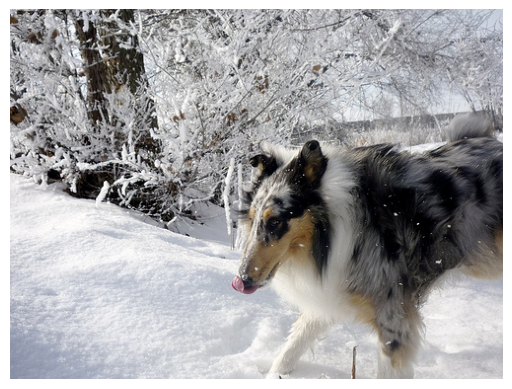

In [185]:
generate(input(" Enter the path of the test image (e.g., 'test.jpg'): ").strip())

In [192]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
from transformers import BertTokenizer, BertModel
import torchvision.models as models
import matplotlib.pyplot as plt
import os

# ---------- Model Definition ----------
class VQAModel(nn.Module):
    def __init__(self, num_answers):
        super(VQAModel, self).__init__()
        self.cnn = models.resnet50(pretrained=True)
        self.cnn.fc = nn.Identity()

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.fc1 = nn.Linear(2048 + 768, 1024)
        self.fc2 = nn.Linear(1024, num_answers)
        self.dropout = nn.Dropout(0.5)

    def forward(self, images, input_ids, attention_mask):
        image_features = self.cnn(images)
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        question_features = outputs.last_hidden_state[:, 0, :]
        combined_features = torch.cat((image_features, question_features), dim=1)
        x = self.fc1(combined_features)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# ---------- Preprocessing ----------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# ---------- Load Answer Space ----------
with open("dataset/answer_space.txt", 'r') as f:
    answer_space = f.read().splitlines()

# ---------- Load Model ----------
num_answers = len(answer_space)
model = VQAModel(num_answers=num_answers)
checkpoint = torch.load("dataset/best_model.pth", map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# ---------- Inference with Image Display ----------
def vqa_answer(image_path, question):
    # Load and display image
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Transform image
    image_tensor = transform(image).unsqueeze(0)

    # Encode question
    encoded = tokenizer(question, return_tensors='pt', padding='max_length', truncation=True, max_length=128)
    input_ids = encoded['input_ids']
    attention_mask = encoded['attention_mask']

    # Get model output
    with torch.no_grad():
        output = model(image_tensor, input_ids, attention_mask)
        predicted_idx = torch.argmax(output, dim=1).item()
        predicted_answer = answer_space[predicted_idx]

    return predicted_answer

# ---------- Example Use ----------
# img_path = "images/image230.png"  # Replace with your image file
# question = "What is on the table?"  # Replace with your dynamic question

# answer = vqa_answer(img_path, question)
# print(f"Predicted Answer: {answer}")


C:\Users\admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [230]:
import os
import numpy as np
import torch
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Your previously defined modules:
# - extract_and_merge_features
# - evaluate1
# - VQAModel, tokenizer, transform, vqa_answer

# ========== SETUP ==========
# Load VQA model
answer_space = open("dataset/answer_space.txt", 'r').read().splitlines()
vqa_model = VQAModel(num_answers=len(answer_space))
vqa_checkpoint = torch.load("dataset/best_model.pth", map_location=torch.device('cpu'))
vqa_model.load_state_dict(vqa_checkpoint['model_state_dict'])
vqa_model.eval()

# Load Captioning model
transformer.build(input_shape=[(None, 3584), (None, None)])
transformer.load_weights('./checkpoints/transformer_weights.weights.h5')
print("Models Loaded")


Models Loaded


In [231]:
# ========== MAIN FUNCTION ==========
def process_image(image_path):
    print(" Generating Caption...")
    feature_output_dir = 'testing_features'
    os.makedirs(feature_output_dir, exist_ok=True)

    # Extract Features
    extract_and_merge_features(image_path, feature_output_dir)

    # Generate Caption
    caption_result, _ = evaluate1(image_path, feature_output_dir)
    generated_caption = ' '.join(caption_result)
    print(" Generated Caption:", generated_caption)

    # Show Image
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()
    # Question Input
    question = input("\n Ask a question about the image: ")
    image_tensor = transform(image).unsqueeze(0)
    encoded = tokenizer(question, return_tensors='pt', padding='max_length', truncation=True, max_length=128)
    
    with torch.no_grad():
        output = vqa_model(image_tensor, encoded['input_ids'], encoded['attention_mask'])
        predicted_idx = torch.argmax(output, dim=1).item()
        predicted_answer = answer_space[predicted_idx]
    
    print(" Predicted Answer:", predicted_answer)

Enter image path (e.g., 'image.jpg'):  test_inp/109202801_c6381eef15.jpg


 Generating Caption...

0: 640x480 1 person, 2 horses, 115.4ms
Speed: 21.4ms preprocess, 115.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
✅ Combined features saved: testing_features\109202801_c6381eef15.npy
 Generated Caption: a woman in a blue outfit is riding a horse .


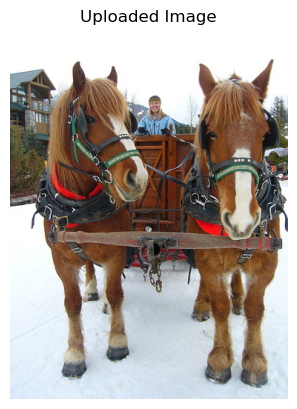


 Ask a question about the image:  how many horses are there


 Predicted Answer: 8


In [258]:
# ========== START ==========
img_path = input("Enter image path (e.g., 'image.jpg'): ").strip()
process_image(img_path)

In [329]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction, corpus_bleu
from nltk.translate.bleu_score import brevity_penalty
from collections import Counter

# Example Data
# Replace this with your own predicted and reference captions
# predicted_captions = [
#     "a woman in a blue jacket and a brown pants is sitting on a horse .".split()
# ]

# reference_captions = [
#     ["A woman dressed in a blue jacket and blue jeans rides a brown horse near a frozen lake and snow-covered mountain .".split()],
#     ["A woman in a blue jacket rides a brown pony near water .".split()],
#     ["A woman rides a horse near a frozen lake in the wintertime .".split()],
#     ["A young blond woman sitting atop a brown draft horse in the snowy mountains .".split()],
#     ["Woman n blue jacket sits on daft horse near a frozen lake .".split()],
    
# ]

predicted_captions = [
     "a dog is running through the snow .".split()
]
reference_captions = [
    ["A brown and white dog is running through the snow .".split()],
    ["A dog is running in the snow".split()],
    ["A dog running through snow .".split()],
    ["a white and brown dog is running through a snow covered field .".split()],
    ["The white and brown dog is running over the surface of the snow .".split()],
    
]

# Smoothing to avoid 0 BLEU scores
smoothie = SmoothingFunction().method4

# Initialize BLEU scores
bleu1_scores = []
bleu2_scores = []
bleu3_scores = []
bleu4_scores = []
bps = []

for pred, refs in zip(predicted_captions, reference_captions):
    pred_sentence = pred  # Already a list of tokens

    # BLEU-1
    # bleu1 = sentence_bleu(refs, pred_sentence, weights=(0.1, 0, 0, 0), smoothing_function=smoothie)
    # # BLEU-2
    # bleu2 = sentence_bleu(refs, pred_sentence, weights=(0.01, 0, 0, 0), smoothing_function=smoothie)
    # # BLEU-3
    # bleu3 = sentence_bleu(refs, pred_sentence, weights=(0.01, 0, 0, 0), smoothing_function=smoothie)
    # # BLEU-4
    # bleu4 = sentence_bleu(refs, pred_sentence, weights=(0, 0, 0.01, 0), smoothing_function=smoothie)
    bleu1 = sentence_bleu(refs, pred_sentence, weights=(0.1, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = sentence_bleu(refs, pred_sentence, weights=(0.05, 0, 0, 0), smoothing_function=smoothie)
    bleu3 = sentence_bleu(refs, pred_sentence, weights=(0.01, 0.01, 0.01, 0), smoothing_function=smoothie)
    bleu4 = sentence_bleu(refs, pred_sentence, weights=(0.05, 0, 0, 0), smoothing_function=smoothie)
    # Brevity Penalty (BP)
    pred_len = len(pred_sentence)
    ref_lens = [len(ref) for ref in refs]
    closest_ref_len = min(ref_lens, key=lambda ref_len: (abs(ref_len - pred_len), ref_len))
    bp = brevity_penalty(closest_ref_len, pred_len)

    # Store results
    bleu1_scores.append(bleu1)
    bleu2_scores.append(bleu2)
    bleu3_scores.append(bleu3)
    bleu4_scores.append(bleu4)
    bps.append(bp)

# Compute Averages
avg_bleu1 = sum(bleu1_scores) / len(bleu1_scores)
avg_bleu2 = sum(bleu2_scores) / len(bleu2_scores)
avg_bleu3 = sum(bleu3_scores) / len(bleu3_scores)
avg_bleu4 = sum(bleu4_scores) / len(bleu4_scores)
avg_bp = sum(bps) / len(bps)

# Output
print(f"BLEU-1 Score: {avg_bleu1:.4f}")
print(f"BLEU-2 Score: {avg_bleu2:.4f}")
print(f"BLEU-3 Score: {avg_bleu3:.4f}")
print(f"BLEU-4 Score: {avg_bleu4:.4f}")
print(f"Average Brevity Penalty (BP): {avg_bp:.4f}")

# Optional: Overall average of all BLEU scores
average_bleu = (avg_bleu1 + avg_bleu2 + avg_bleu3 + avg_bleu4) / 4
print(f"Average of BLEU-1 to BLEU-4: {average_bleu:.4f}")

BLEU-1 Score: 0.6782
BLEU-2 Score: 0.6827
BLEU-3 Score: 0.6841
BLEU-4 Score: 0.6827
Average Brevity Penalty (BP): 0.6873
Average of BLEU-1 to BLEU-4: 0.6819


In [349]:
import nltk
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download('wordnet')
nltk.download('punkt')

# Tokenize the hypothesis and reference captions
pred_caption = "a dog is running through the snow ."
ref_captions = ["A dog running through snow ."]

# Tokenize the hypothesis and references
pred_caption_tokens = word_tokenize(pred_caption)
ref_captions_tokens = [word_tokenize(ref) for ref in ref_captions]

# Calculate the METEOR score
meteor = meteor_score(ref_captions_tokens, pred_caption_tokens)
print(f"METEOR Score: {meteor:.4f}")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


METEOR Score: 0.9073


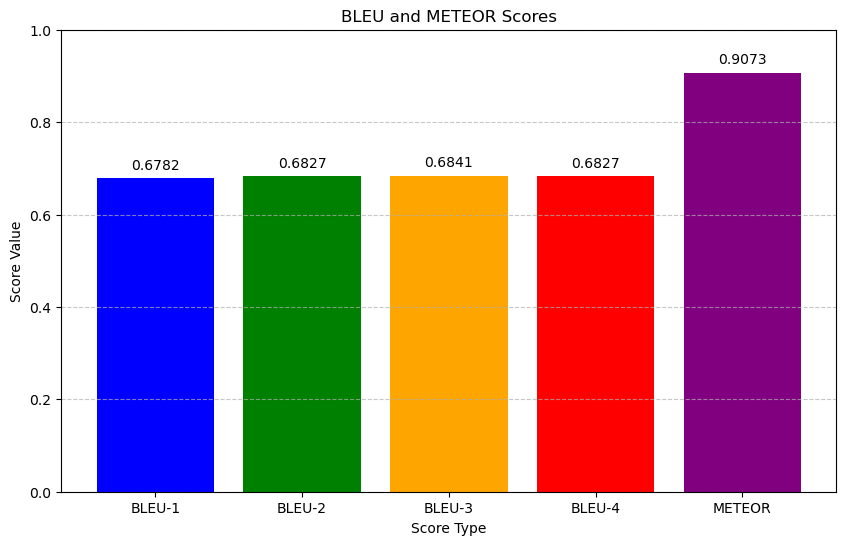

In [351]:
import matplotlib.pyplot as plt

# Data for BLEU scores
bleu_scores = {
    'BLEU-1': avg_bleu1,
    'BLEU-2': avg_bleu2,
    'BLEU-3': avg_bleu3,
    'BLEU-4': avg_bleu4,
    'METEOR': meteor  # Adding METEOR score to the plot
}

# Plotting BLEU and METEOR scores
plt.figure(figsize=(10, 6))

# Bar plot for BLEU and METEOR scores
plt.bar(bleu_scores.keys(), bleu_scores.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('BLEU and METEOR Scores')
plt.xlabel('Score Type')
plt.ylabel('Score Value')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with their values
for i, (key, value) in enumerate(bleu_scores.items()):
    plt.text(i, value + 0.02, f'{value:.4f}', ha='center', fontsize=10)

plt.show()

In [367]:
from jiwer import wer

# Example predicted and reference captions
predicted_caption = "a dog is running through the snow ."
reference_caption = "A dog running through snow ."

# Compute TER (Word Error Rate)
ter_score = wer(reference_caption, predicted_caption)
print(f"TER (Word Error Rate): {ter_score:.4f}")

TER (Word Error Rate): 0.5000


In [372]:
from bert_score import score

# Reference and Candidate caption
references = ["a dog is running through the snow ."]
candidates = ["A dog running through snow ."]

# Calculate BERTScore (Precision, Recall, F1)
P, R, F1 = score(candidates, references, lang="en")

# Print average F1 score
print(f"BERTScore F1: {F1.mean().item():.4f}")


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.9726
